In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
train_data = kgs.load_all_train_data()
data = np.stack([d.spectrum for d in train_data])
wavelengths = kgs.wavelengths[1:]
data = data[:,1:].T
data.shape

(282, 1100)

Text(0, 0.5, 'Transit depth')

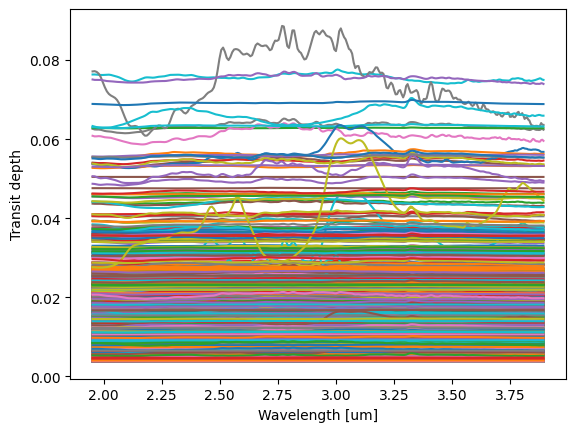

In [13]:
plt.figure()
plt.plot(wavelengths, data);
plt.xlabel('Wavelength [um]')
plt.ylabel('Transit depth')

Text(0, 0.5, 'Transit depth (mean removed)')

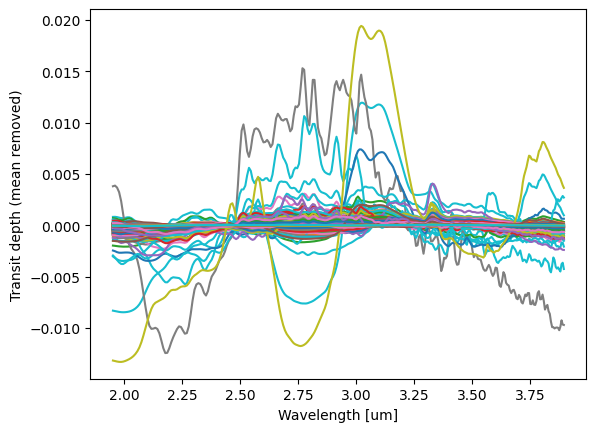

In [14]:
plt.figure()
plt.plot(wavelengths, data-np.mean(data,0));
plt.xlabel('Wavelength [um]')
plt.ylabel('Transit depth (mean removed)')

Text(0, 0.5, 'Transit depth (mean removed, normalized)')

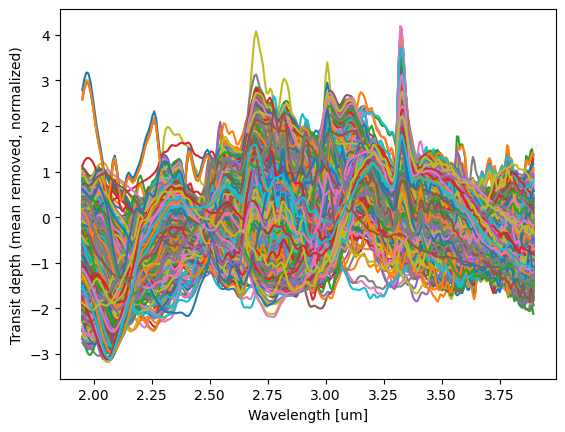

In [23]:
high_std = np.std(data,0)>1e-5
this_data = data[:,high_std]
plt.figure()
plt.plot(wavelengths, (this_data-np.mean(this_data,0))/np.std(this_data,0));
plt.xlabel('Wavelength [um]')
plt.ylabel('Transit depth (mean removed, normalized)')

Text(0, 0.5, 'Std of transit depth')

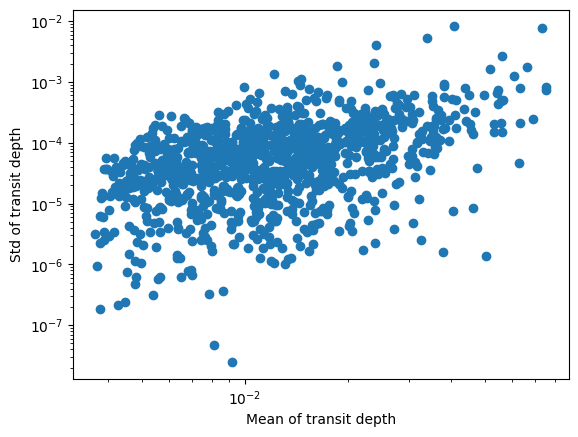

In [18]:
plt.figure()
plt.scatter(np.mean(data,0), np.std(data,0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean of transit depth')
plt.ylabel('Std of transit depth')

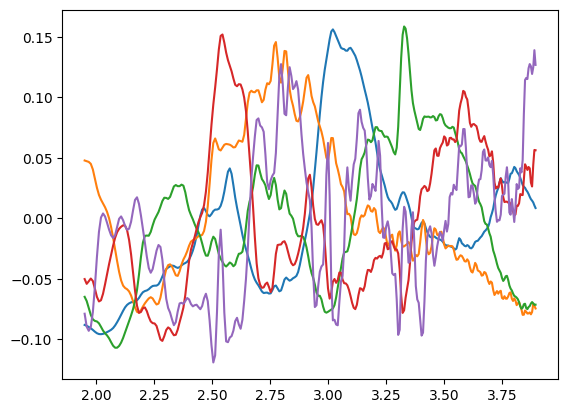

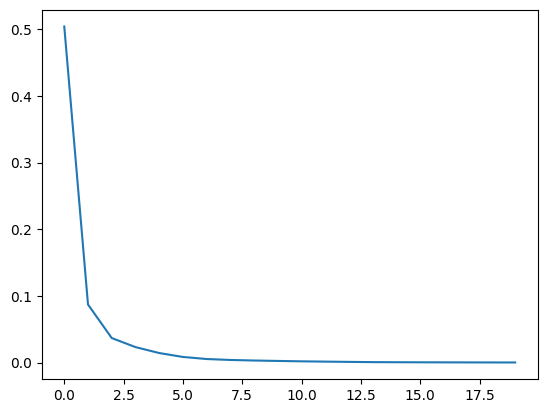

In [60]:
from sklearn.decomposition import PCA
import numpy as np

N=1

pca = PCA()
pca.fit((data-np.mean(data,0)).T)
components = pca.components_          # Principal directions (eigenvectors)
explained_variance = 1-np.cumsum(pca.explained_variance_ratio_)  # Variance explained by each PC

plt.figure()
plt.plot(wavelengths,components[:5,:].T);
plt.figure()
plt.plot(explained_variance[:20])